In [2]:
 import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
   'new-plant-diseases-dataset/train',
    labels="inferred",
    label_mode="categorical",
    
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new-plant-diseases-dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 69.25  60.25  66.25]
   [ 74.5   63.5   71.5 ]
   [ 70.75  61.75  67.75]
   ...
   [ 55.    45.75  50.  ]
   [ 53.    44.    48.  ]
   [ 53.25  44.    48.25]]

  [[164.25 153.25 161.25]
   [141.75 130.75 138.75]
   [160.   149.   157.  ]
   ...
   [ 93.    82.    88.  ]
   [ 87.75  76.75  82.75]
   [ 86.5   75.5   81.5 ]]

  [[140.5  129.5  137.5 ]
   [158.   147.   155.  ]
   [145.5  134.5  142.5 ]
   ...
   [ 88.    77.    83.  ]
   [ 86.25  75.25  81.25]
   [ 87.75  76.75  82.75]]

  ...

  [[173.   158.   165.  ]
   [152.   137.   144.  ]
   [150.75 135.75 142.75]
   ...
   [106.5   91.5   98.5 ]
   [ 80.5   65.5   72.5 ]
   [ 99.25  84.25  91.25]]

  [[156.   141.   148.  ]
   [148.   133.   140.  ]
   [147.5  132.5  139.5 ]
   ...
   [ 87.5   72.5   79.5 ]
   [ 79.    64.    71.  ]
   [101.5   86.5   93.5 ]]

  [[156.75 141.75 148.75]
   [152.5  137.5  144.5 ]
   [161.   146.   153.  ]
   ...
   [ 95.75  80.75  87.75]
   [ 84.5   69.5   76.5 ]
   [ 97.25  82.25  8

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [16]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 183s 79ms/step - loss: 0.9386 - accuracy: 0.7301 - val_loss: 0.4647 - val_accuracy: 0.8525
Epoch 2/10
2197/2197 [==============================] - 171s 78ms/step - loss: 0.2688 - accuracy: 0.9146 - val_loss: 0.5095 - val_accuracy: 0.8396
Epoch 3/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.1475 - accuracy: 0.9506 - val_loss: 0.2024 - val_accuracy: 0.9345
Epoch 4/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.0966 - accuracy: 0.9678 - val_loss: 0.1879 - val_accuracy: 0.9420
Epoch 5/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.0738 - accuracy: 0.9754 - val_loss: 0.2177 - val_accuracy: 0.9384
Epoch 6/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.0587 - accuracy: 0.9807 - val_loss: 0.3630 - val_accuracy: 0.9011
Epoch 7/10
2197/2197 [==============================] - 171s 78ms/step - loss: 0.0476 - accuracy: 0.9844 - val_loss: 0

### Model Evaluation

In [21]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 57s 26ms/step - loss: 0.0267 - accuracy: 0.9907


In [22]:
print(train_loss,train_acc)

0.026657987385988235 0.990696370601654


In [23]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 14s 25ms/step - loss: 0.2173 - accuracy: 0.9501


In [24]:
print(val_loss,val_acc)

0.2173270434141159 0.9501479864120483


### Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'loss': [0.9385876059532166,
  0.2687891721725464,
  0.14747150242328644,
  0.09663990139961243,
  0.0738258883357048,
  0.05868266150355339,
  0.04755744710564613,
  0.040546104311943054,
  0.038084082305431366,
  0.030423961579799652],
 'accuracy': [0.7300803661346436,
  0.914560079574585,
  0.9505939483642578,
  0.9677501916885376,
  0.9753751754760742,
  0.9807240962982178,
  0.9843801259994507,
  0.9866420030593872,
  0.988121509552002,
  0.9902837872505188],
 'val_loss': [0.464688777923584,
  0.5094521045684814,
  0.20239980518817902,
  0.18791590631008148,
  0.21774035692214966,
  0.3629799485206604,
  0.22916550934314728,
  0.2202976644039154,
  0.17057470977306366,
  0.21732720732688904],
 'val_accuracy': [0.8525494933128357,
  0.8395743370056152,
  0.9344980716705322,
  0.9419531226158142,
  0.9384247660636902,
  0.9010926485061646,
  0.9390507340431213,
  0.9410994648933411,
  0.9550421237945557,
  0.9501479864120483]}

In [27]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

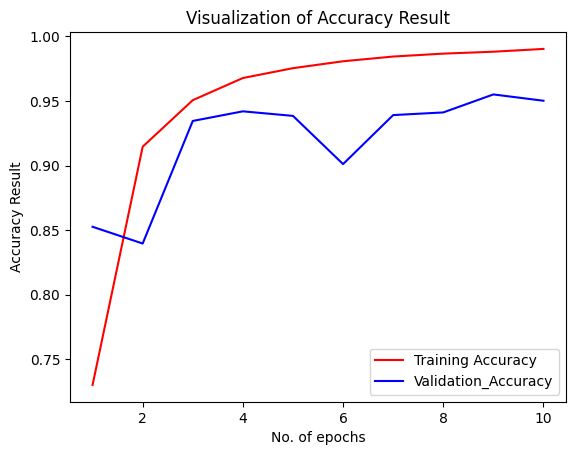

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation_Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [64]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'new-plant-diseases-dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
)

Found 17572 files belonging to 38 classes.


In [65]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 14s 26ms/step


(array([[9.9996901e-01, 3.6270617e-08, 6.1764912e-12, ..., 4.8646122e-11,
         2.7484427e-13, 5.5684749e-14],
        [9.9979347e-01, 1.7816035e-08, 2.1282512e-10, ..., 6.7707480e-09,
         1.6382272e-13, 3.0329125e-11],
        [9.9992323e-01, 4.5830452e-14, 8.4397029e-12, ..., 7.2071409e-19,
         3.6881085e-16, 1.1450142e-16],
        ...,
        [2.2826757e-10, 1.8345611e-12, 5.5055528e-07, ..., 2.4661892e-10,
         3.9086648e-10, 9.9999595e-01],
        [5.3665605e-09, 4.7047979e-15, 6.2007822e-11, ..., 7.1169861e-09,
         1.0326795e-11, 9.9999881e-01],
        [2.3391518e-15, 1.6042462e-19, 3.7160434e-16, ..., 2.1671839e-17,
         7.7886082e-14, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [66]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [67]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [69]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.92      0.94       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.89      0.97      0.93       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.85      0.90       410
                       Corn_(maize)___Common_rust_       0.98      0.98      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.95      0.

In [75]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[462,   1,   0, ...,   0,   1,   0],
       [  0, 475,   1, ...,   0,   0,   0],
       [  0,   0, 423, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 441,   0],
       [  0,   0,   1, ...,   0,   0, 470]], dtype=int64)

### Confusion Matrix Visualization

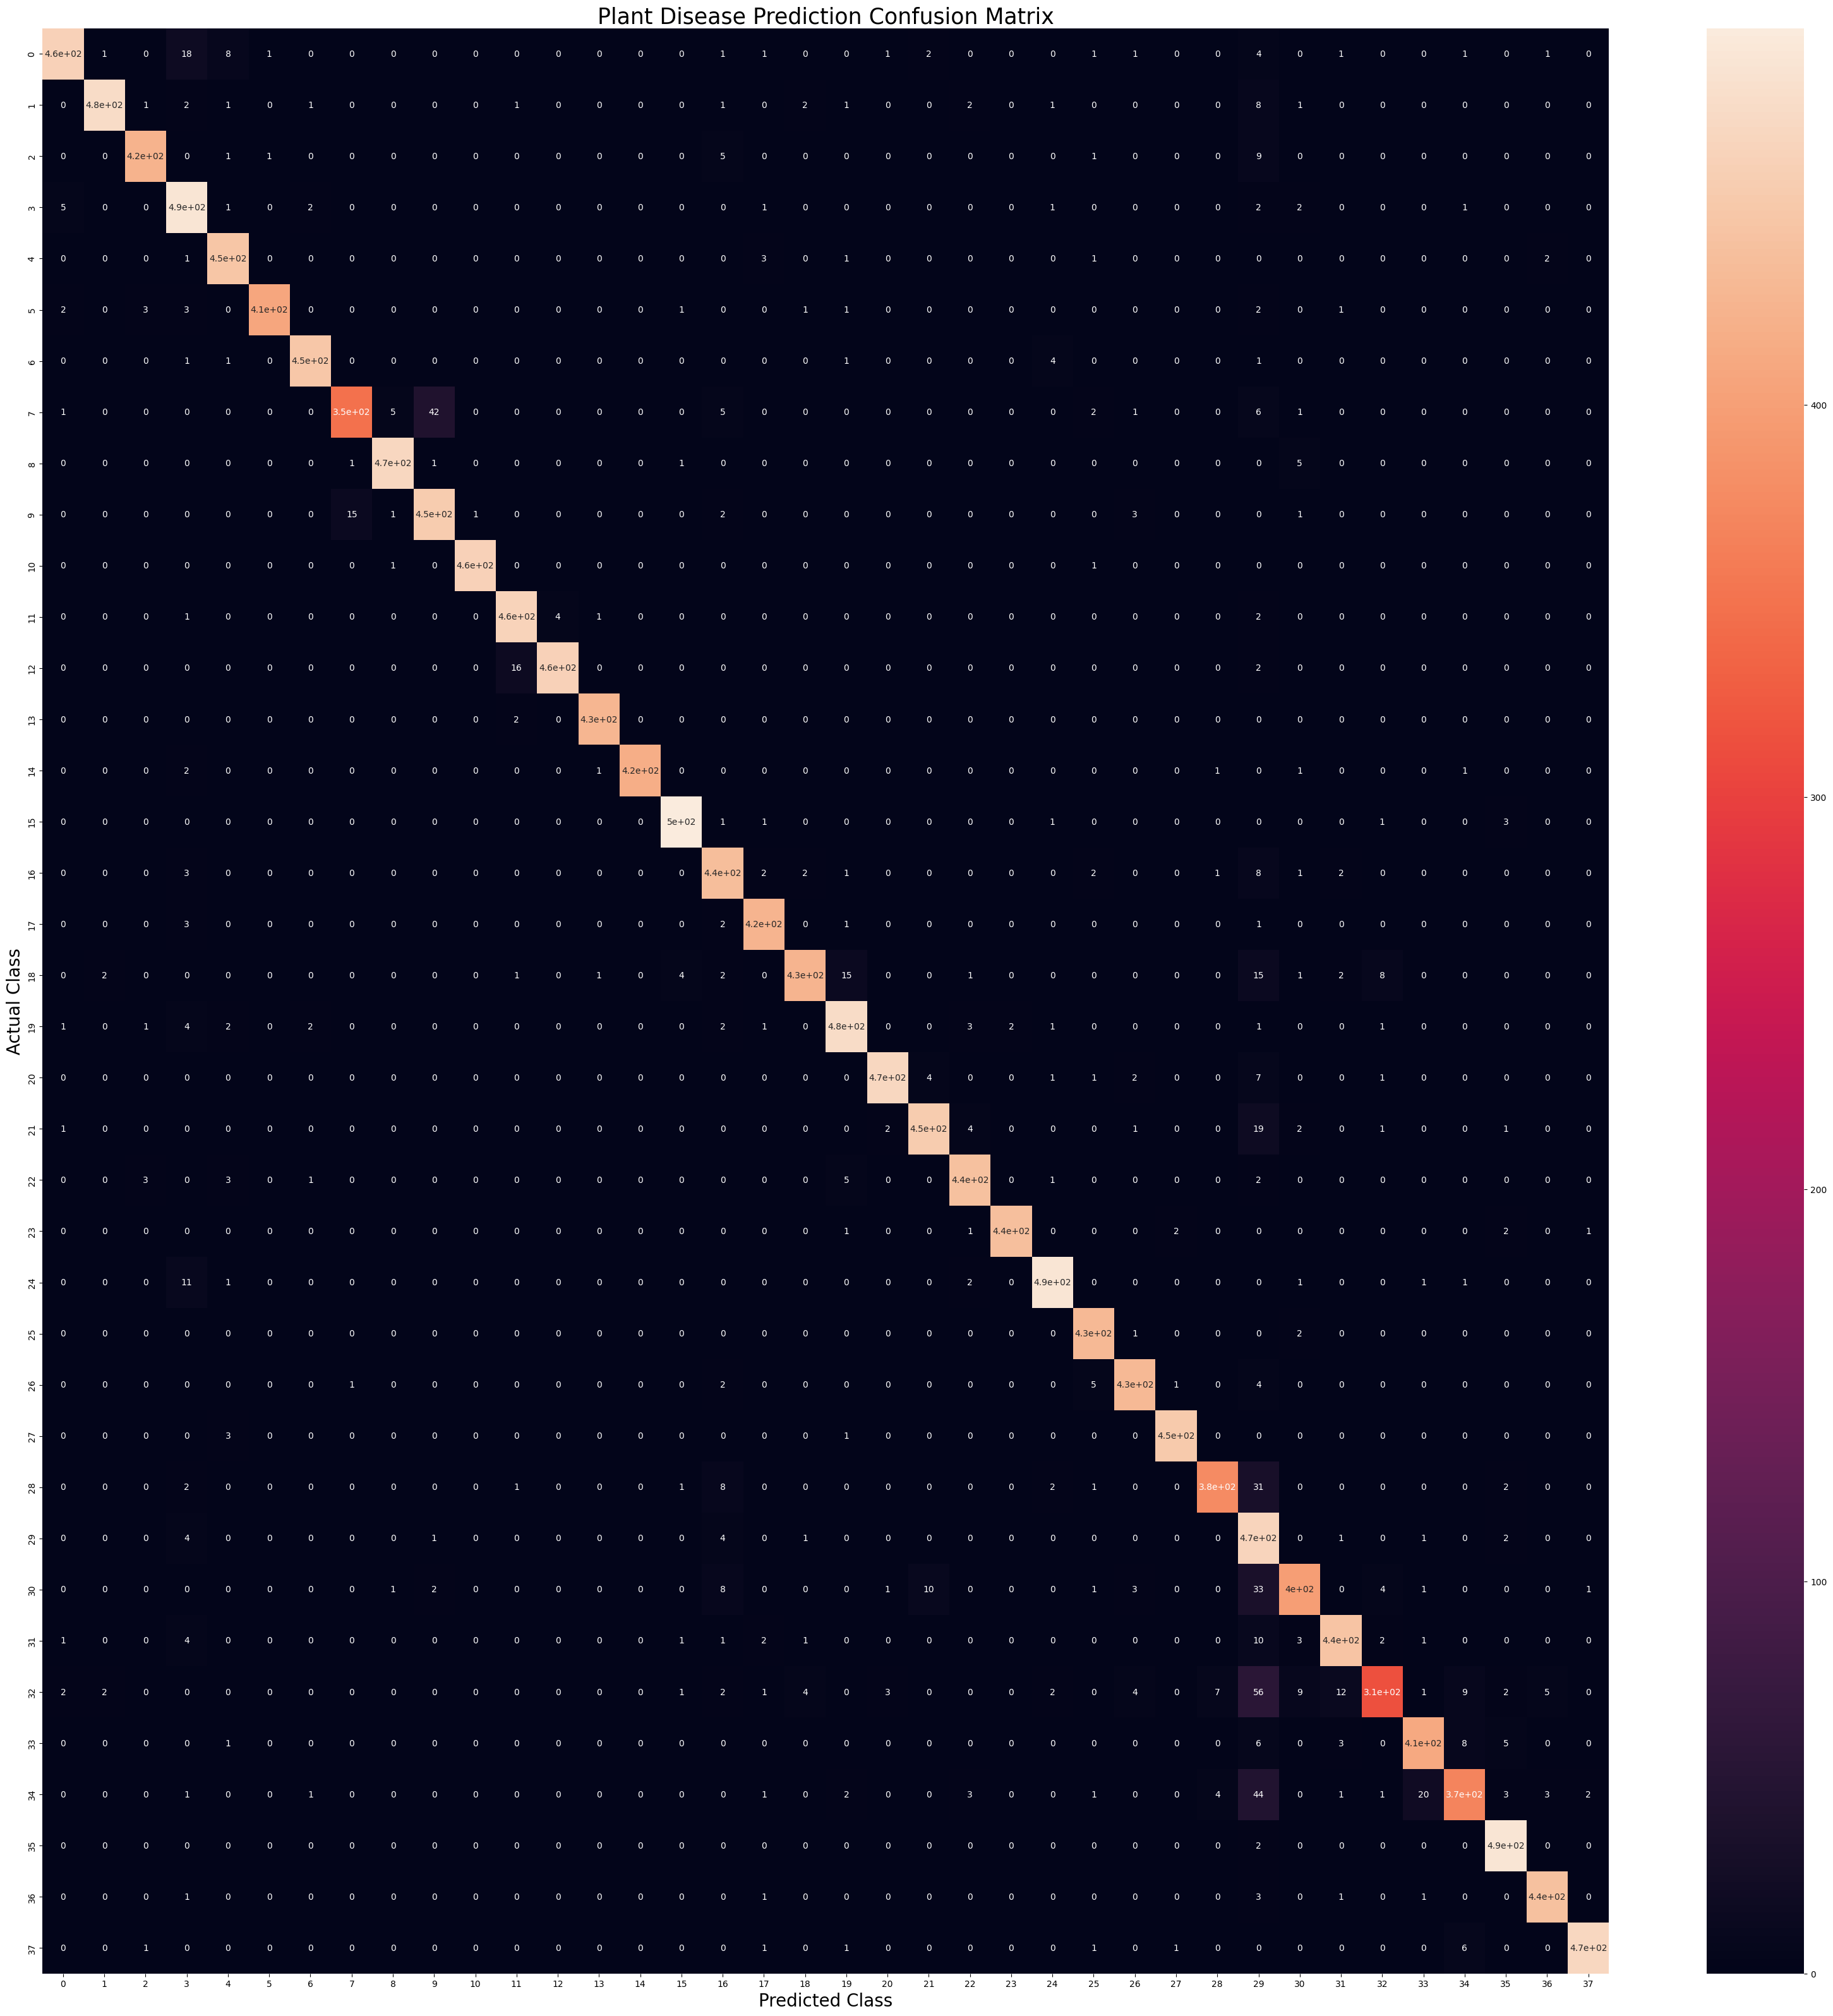

In [81]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()